## Задание №1. Соединение данных из нескольких источников (SQL JOIN)

Задача:Есть две таблицы: одна содержит информацию о сотрудниках (Employees), вторая — о департаментах (Departments). Каждая запись в таблице сотрудников ссылается на соответствующий департамент. Объедините обе таблицы, используя SQL JOIN, чтобы получить полную информацию обо всех сотрудниках и их департаментах.

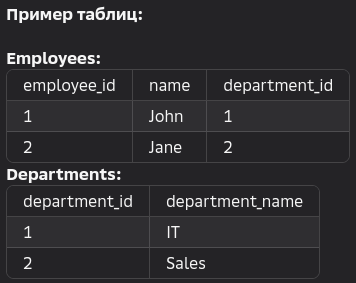

In [13]:
import sqlite3

# Создаем временную базу данных
conn = sqlite3.connect(':memory:')
cur = conn.cursor()

# Создаем таблицы
cur.execute("""
CREATE TABLE Employees(
    employee_id INT PRIMARY KEY,
    name TEXT,
    department_id INT
)
""")

cur.execute("""
CREATE TABLE Departments(
    department_id INT PRIMARY KEY,
    department_name TEXT
)
""")

# Вставляем данные
employees_data = [(1, 'John', 1), (2, 'Jane', 2)]
departments_data = [(1, 'IT'), (2, 'Sales')]

cur.executemany("INSERT INTO Employees VALUES(?, ?, ?)", employees_data)
cur.executemany("INSERT INTO Departments VALUES (?, ?)", departments_data)

# Запрашиваем объединённые данные
cur.execute("""
SELECT Employees.name, Departments.department_name FROM Employees
LEFT JOIN  Departments ON Employees.department_id=Departments.department_id
""")

# Выводим результат
results = cur.fetchall()
for result in results:
    print(result)

# Закрываем подключение
conn.close()

('John', 'IT')
('Jane', 'Sales')
